In [77]:
import pandas as pd
import arules as ar
from arules.utils import five_quantile_based_bins, top_5_variant_variables, top_bottom_10
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from scipy.stats import zscore


In [78]:
df = pd.read_csv('data/Life_Expectancy_Data.csv')
print (df.columns)
print(df['Adult Mortality'])

Index(['Country', 'Year', 'Status', 'Life expectancy ', 'Adult Mortality',
       'infant deaths', 'Alcohol', 'percentage expenditure', 'Hepatitis B',
       'Measles ', ' BMI ', 'under-five deaths ', 'Polio', 'Total expenditure',
       'Diphtheria ', ' HIV/AIDS', 'GDP', 'Population',
       ' thinness  1-19 years', ' thinness 5-9 years',
       'Income composition of resources', 'Schooling'],
      dtype='object')
0       263
1       271
2       268
3       272
4       275
       ... 
1644    723
1645    715
1646     73
1647    686
1648    665
Name: Adult Mortality, Length: 1649, dtype: int64


# Analisar os dataset 

A análise deste dataset terá como objetivo principal identificar e aplicar otimizações que facilitem o uso dos dados em trabalhos futuros. Para isso, será essencial garantir que o dataset esteja bem estruturado e livre de inconsistências. Os passos a serem seguidos incluem:

1. **Identificação de valores ausentes (missing values)**: Uma das primeiras tarefas será verificar se existem valores nulos ou ausentes em qualquer uma das colunas. 
Estes valores podem comprometer a análise e, portanto, será necessário tratá-los de forma adequada.

2. **Tratamento de valores ausentes**: Caso sejam identificados valores ausentes, eles serão substituídos por valores calculados, como a média ou a mediana da respectiva coluna. Esta abordagem ajuda a preservar a integridade estatística do dataset e evita a exclusão de dados relevantes.

3. **Limpeza dos dados**: Remover espaços desnecessários nos nomes das colunas e padronizar os formatos dos dados (por exemplo, datas, números e categorias) para assegurar a consistência e facilitar a análise posterior.
4. **Realizar Analisa exploratorio de dados**

In [79]:
missing_values = df.isnull().sum()
print (missing_values)

Country                            0
Year                               0
Status                             0
Life expectancy                    0
Adult Mortality                    0
infant deaths                      0
Alcohol                            0
percentage expenditure             0
Hepatitis B                        0
Measles                            0
 BMI                               0
under-five deaths                  0
Polio                              0
Total expenditure                  0
Diphtheria                         0
 HIV/AIDS                          0
GDP                                0
Population                         0
 thinness  1-19 years              0
 thinness 5-9 years                0
Income composition of resources    0
Schooling                          0
dtype: int64


# Verificação de valores nulos nos atributos
Ao gerir o codigo para verificar os valores nulos nos atributos, o output mostra todos os variaveis. O valor 0 mostra que nao existe os valores nulos nesses atributos.

# Arules 

Utiliza o arules para realizar uma regra de associação entre os atributos do dataset com o objetivo de identifiar as relacoes importantes entre as variaveis ou determinantes que afetam a Mortalidade Adulta e a Expectativa de Vida. 

Na aplicação do algoritmo ira utilizar algoritmo como apriori para encontrar associações frequentes. Por exemplo, se Alcool é baixo e schooling é alto, entao a expectativa de vida é alta. 

Na avaliação de regras ira avaliar a parte do Suporte (Frequencia de regras de dados), a Confiança (probabilidade de o consequente ocorrer dado o antecendente) e o Lift funciona como indicador da forca de associação.

Para isso, os atributos numricos devem ser discretizados porque o aules so recebe os valores discretizados. 




In [80]:
quantiles1 = five_quantile_based_bins(df['Year'])
quantiles2= five_quantile_based_bins(df['Life expectancy '])
quantiles3 = five_quantile_based_bins(df['Adult Mortality'])
quantiles4 = five_quantile_based_bins(df['infant deaths'])
quantiles5 = five_quantile_based_bins(df['Alcohol'])
quantiles6 = five_quantile_based_bins(df['percentage expenditure'])
quantiles7 = five_quantile_based_bins(df['Hepatitis B'])
quantiles8 = five_quantile_based_bins(df['Measles '])
quantiles9 = five_quantile_based_bins(df[' BMI '])
quantiles10 = five_quantile_based_bins(df['under-five deaths '])
quantiles11 = five_quantile_based_bins(df['Polio'])
quantiles12 = five_quantile_based_bins(df['Total expenditure'])
quantiles13 = five_quantile_based_bins(df['Diphtheria '])
quantiles14 = five_quantile_based_bins(df[' HIV/AIDS'])
quantiles15 = five_quantile_based_bins(df['GDP'])
quantiles16 = five_quantile_based_bins(df['Population'])
quantiles17 = five_quantile_based_bins(df[' thinness  1-19 years'])
quantiles18 = five_quantile_based_bins(df[' thinness 5-9 years'])
quantiles19 = five_quantile_based_bins(df['Income composition of resources'])
quantiles20 = five_quantile_based_bins(df['Schooling'])



# Categoria de variaveis discretizadas

Com base na discretização de dados, o Atributo Adult Mortality possui os seguintes categorias. 

Name: Adult Mortality, Length: 1649, dtype: category
Categories (5, object): ['[1 - 65]' < '(65 - 128]' < '(128 - 176]' < '(176 - 254]' < '(254 - 723]']

Neste caso, como o objetivo para a decisao de problema é para determinar "Quais são os principais determinantes que afetam a maior taxa de mortalidade adulta (Adult Mortality) e diminui a taxa da expectativa de vida(consequente) ", então, o intervalo seria escolhido para o proximo passo é o mais alto neste caso, é o '(254 - 723]'. 

In [81]:
rules, supp_dict = ar.create_association_rules(df, max_cols=2, binning_method=five_quantile_based_bins)
rules

Calculating all relevant supports
100%|██████████| 253/253 [00:00<00:00, 1665.44it/s]

Calculating all feature level rules per variable level rule
100%|██████████| 462/462 [00:00<00:00, 1423.08it/s]
Overall # of Rules:  9690


,antecedent,consequent,rule print,ant_count,con_count,rule_count,ant_supp,con_supp,rule_supp,confidence,lift,# of all records
0,{'Diphtheria ': '9'},{'Polio': '9'},Diphtheria =9 ==> Polio=9,38,46,19,0.023044,0.027896,0.011522,0.5000,17.9239,1649
1,{'Polio': '9'},{'Diphtheria ': '9'},Polio=9 ==> Diphtheria =9,46,38,19,0.027896,0.023044,0.011522,0.4130,17.9239,1649
2,{'Polio': '89'},{'Diphtheria ': '89'},Polio=89 ==> Diphtheria =89,38,48,17,0.023044,0.029109,0.010309,0.4474,15.3690,1649
3,{'Diphtheria ': '89'},{'Polio': '89'},Diphtheria =89 ==> Polio=89,48,38,17,0.029109,0.023044,0.010309,0.3542,15.3690,1649
4,{'Polio': '91'},{'Diphtheria ': '91'},Polio=91 ==> Diphtheria =91,52,57,27,0.031534,0.034566,0.016374,0.5192,15.0213,1649
...,...,...,...,...,...,...,...,...,...,...,...,...
9685,{'under-five deaths ': '[0 - 2]'},{'Adult Mortality': '(254 - 723]'},under-five deaths =[0 - 2] ==> Adult Mortality...,698,329,25,0.423287,0.199515,0.015161,0.0358,0.1795,1649
9686,{'under-five deaths ': '(42 - 2100]'},{'Measles ': '[0 - 2]'},under-five deaths =(42 - 2100] ==> Measles =[0...,321,666,22,0.194663,0.403881,0.013341,0.0685,0.1697,1649
9687,{'Measles ': '[0 - 2]'},{'under-five deaths ': '(42 - 2100]'},Measles =[0 - 2] ==> under-five deaths =(42 - ...,666,321,22,0.403881,0.194663,0.013341,0.0330,0.1697,1649
9688,{'Life expectancy ': '[44.0 - 62.0]'},{' HIV/AIDS': '[0.1 - 0.2]'},Life expectancy =[44.0 - 62.0] ==> HIV/AIDS=[...,332,1030,23,0.201334,0.624621,0.013948,0.0693,0.1109,1649


In [82]:
ar.present_rules_per_consequent(rules,consequent={'Adult Mortality':'(254 - 723]'}, 
                                selection_function=top_5_variant_variables, drop_dups = True, plot= False) 



 HIV/AIDS


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/numpy/core/fromnumeric.py:3643: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  return std(axis=axis, dtype=dtype, out=out, ddof=ddof, **kwargs)


,rule print,ant_supp,con_supp,rule_supp,confidence,lift
1,HIV/AIDS=(1.3 - 50.6] ==> Adult Mortality=(25...,0.194663,0.199515,0.140085,0.7196,3.6069
49,HIV/AIDS=(0.2 - 1.3] ==> Adult Mortality=(254...,0.180716,0.199515,0.033960,0.1879,0.9419
76,HIV/AIDS=[0.1 - 0.2] ==> Adult Mortality=(254...,0.624621,0.199515,0.025470,0.0408,0.2044


Life expectancy 


,rule print,ant_supp,con_supp,rule_supp,confidence,lift
0,Life expectancy =[44.0 - 62.0] ==> Adult Morta...,0.201334,0.199515,0.155852,0.7741,3.8799
39,Life expectancy =(62.0 - 68.0] ==> Adult Morta...,0.198908,0.199515,0.041237,0.2073,1.0391


Income composition of resources


,rule print,ant_supp,con_supp,rule_supp,confidence,lift
2,Income composition of resources=[0.0 - 0.5] ==...,0.200728,0.199515,0.120073,0.5982,2.9982
27,Income composition of resources=(0.5 - 0.6] ==...,0.201941,0.199515,0.050334,0.2492,1.2493
66,Income composition of resources=(0.6 - 0.7] ==...,0.198302,0.199515,0.018193,0.0917,0.4598
75,Income composition of resources=(0.7 - 0.8] ==...,0.200728,0.199515,0.010916,0.0544,0.2726


Schooling


,rule print,ant_supp,con_supp,rule_supp,confidence,lift
3,Schooling=[4.0 - 10.0] ==> Adult Mortality=(25...,0.202547,0.199515,0.109157,0.5389,2.7012
33,Schooling=(10.0 - 12.0] ==> Adult Mortality=(2...,0.210431,0.199515,0.047301,0.2248,1.1267
60,Schooling=(12.0 - 13.0] ==> Adult Mortality=(2...,0.187993,0.199515,0.023651,0.1258,0.6306
69,Schooling=(13.0 - 15.0] ==> Adult Mortality=(2...,0.208005,0.199515,0.016980,0.0816,0.4092


 thinness  1-19 years


,rule print,ant_supp,con_supp,rule_supp,confidence,lift
5,thinness 1-19 years=(8.0 - 27.0] ==> Adult M...,0.197696,0.199515,0.086719,0.4387,2.1986
11,thinness 1-19 years=(5.0 - 8.0] ==> Adult Mo...,0.202547,0.199515,0.070952,0.3503,1.7558
62,thinness 1-19 years=(2.0 - 5.0] ==> Adult Mo...,0.186173,0.199515,0.021831,0.1173,0.5877
72,thinness 1-19 years=(1.0 - 2.0] ==> Adult Mo...,0.209218,0.199515,0.014554,0.0696,0.3487


# Selecionar os atributos com a confidencia maior que 50% 

Após listar todas as regras encontradas e filtrar as regras em que o consequente é o Mortalidade Adulto. Resultado é por antecedente. 

Agora, a proxima coisa para fazer é selecionar as regras de consequente onde as confiancas é maior que 50%. Escolha 50% porque as regras para determinar se é passa ou não, o resultado pelo menos maior que 50%. 

In [83]:
adultmortality = rules[rules['consequent'] == {'Adult Mortality':'(254 - 723]'}]
adultmortality = adultmortality[adultmortality['confidence'] > 0.5]
adultmortality

,antecedent,consequent,rule print,ant_count,con_count,rule_count,ant_supp,con_supp,rule_supp,confidence,lift,# of all records
75,{'Life expectancy ': '[44.0 - 62.0]'},{'Adult Mortality': '(254 - 723]'},Life expectancy =[44.0 - 62.0] ==> Adult Morta...,332,329,257,0.201334,0.199515,0.155852,0.7741,3.8799,1649
88,{' HIV/AIDS': '(1.3 - 50.6]'},{'Adult Mortality': '(254 - 723]'},HIV/AIDS=(1.3 - 50.6] ==> Adult Mortality=(25...,321,329,231,0.194663,0.199515,0.140085,0.7196,3.6069,1649
147,{'Income composition of resources': '[0.0 - 0....,{'Adult Mortality': '(254 - 723]'},Income composition of resources=[0.0 - 0.5] ==...,331,329,198,0.200728,0.199515,0.120073,0.5982,2.9982,1649
217,{'Schooling': '[4.0 - 10.0]'},{'Adult Mortality': '(254 - 723]'},Schooling=[4.0 - 10.0] ==> Adult Mortality=(25...,334,329,180,0.202547,0.199515,0.109157,0.5389,2.7012,1649


In [84]:
rules, supp_dict = ar.create_association_rules(df, max_cols=2,
                                               list_of_ants= ['Life expectancy ', ' HIV/AIDS', 'Income composition of resources' , 'Schooling'],
                                               list_of_cons=['Adult Mortality'],
                                               binning_method=five_quantile_based_bins)    


Calculating all relevant supports
100%|██████████| 15/15 [00:00<00:00, 2371.90it/s]

Calculating all feature level rules per variable level rule
100%|██████████| 4/4 [00:00<00:00, 1389.88it/s]
Overall # of Rules:  72


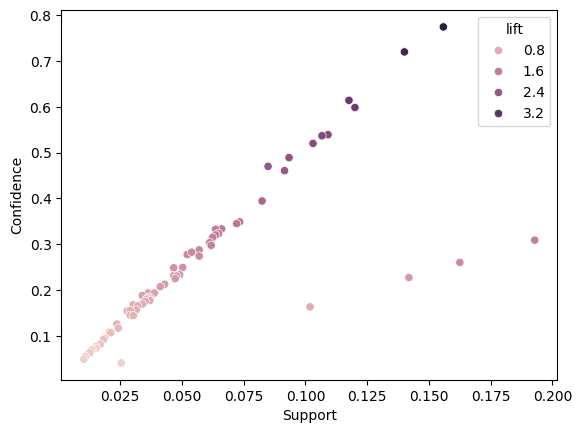

In [85]:
sns.scatterplot(data=rules, x='rule_supp', y='confidence', hue='lift')
plt.xlabel('Support')
plt.ylabel('Confidence')

def lable_point(x, y, val, ax):
    a = pd.concat({'x': x, 'y': y, 'val': val}, axis=1)
    for i, point in a.iterrows():
        ax.text(point['x']+.02, point['y'], str(point['val']))

    lable_point(rules['rule_supp'], rules['confidence'], rules['rule print'], plt.gca())

# Criar regras de associação para a variavel Life expectancy

Neste caso, o o+jetivo é para determinar as regras de associação para a variavel Life expectancy. permite identificar as variaveis que cause a diminuição da expectativa da vida. 

Name: Life expectancy , Length: 1649, dtype: category
Categories (5, object): ['[44.0 - 62.0]' < '(62.0 - 68.0]' < '(68.0 - 73.0]' < '(73.0 - 76.0]' < '(76.0 - 89.0]']

Este intervalo representa a categoria da Life expectancy, onde o objetivo é buscar o menor interavlo como o a barreira para corresponder as determinates que diminui a taxa de Life expectancy. 

In [86]:
rules, supp_dict = ar.create_association_rules(df, max_cols=2, binning_method=five_quantile_based_bins)
rules

Calculating all relevant supports
100%|██████████| 253/253 [00:00<00:00, 1873.09it/s]

Calculating all feature level rules per variable level rule
100%|██████████| 462/462 [00:00<00:00, 1452.22it/s]
Overall # of Rules:  9690


,antecedent,consequent,rule print,ant_count,con_count,rule_count,ant_supp,con_supp,rule_supp,confidence,lift,# of all records
0,{'Diphtheria ': '9'},{'Polio': '9'},Diphtheria =9 ==> Polio=9,38,46,19,0.023044,0.027896,0.011522,0.5000,17.9239,1649
1,{'Polio': '9'},{'Diphtheria ': '9'},Polio=9 ==> Diphtheria =9,46,38,19,0.027896,0.023044,0.011522,0.4130,17.9239,1649
2,{'Polio': '89'},{'Diphtheria ': '89'},Polio=89 ==> Diphtheria =89,38,48,17,0.023044,0.029109,0.010309,0.4474,15.3690,1649
3,{'Diphtheria ': '89'},{'Polio': '89'},Diphtheria =89 ==> Polio=89,48,38,17,0.029109,0.023044,0.010309,0.3542,15.3690,1649
4,{'Polio': '91'},{'Diphtheria ': '91'},Polio=91 ==> Diphtheria =91,52,57,27,0.031534,0.034566,0.016374,0.5192,15.0213,1649
...,...,...,...,...,...,...,...,...,...,...,...,...
9685,{'under-five deaths ': '[0 - 2]'},{'Adult Mortality': '(254 - 723]'},under-five deaths =[0 - 2] ==> Adult Mortality...,698,329,25,0.423287,0.199515,0.015161,0.0358,0.1795,1649
9686,{'under-five deaths ': '(42 - 2100]'},{'Measles ': '[0 - 2]'},under-five deaths =(42 - 2100] ==> Measles =[0...,321,666,22,0.194663,0.403881,0.013341,0.0685,0.1697,1649
9687,{'Measles ': '[0 - 2]'},{'under-five deaths ': '(42 - 2100]'},Measles =[0 - 2] ==> under-five deaths =(42 - ...,666,321,22,0.403881,0.194663,0.013341,0.0330,0.1697,1649
9688,{'Life expectancy ': '[44.0 - 62.0]'},{' HIV/AIDS': '[0.1 - 0.2]'},Life expectancy =[44.0 - 62.0] ==> HIV/AIDS=[...,332,1030,23,0.201334,0.624621,0.013948,0.0693,0.1109,1649


In [87]:
ar.present_rules_per_consequent(rules, consequent = {'Life expectancy ' : '[44.0 - 62.0]'},
                            selection_function = top_5_variant_variables, drop_dups = True,
                            plot = False)


 HIV/AIDS


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/numpy/core/fromnumeric.py:3643: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  return std(axis=axis, dtype=dtype, out=out, ddof=ddof, **kwargs)


,rule print,ant_supp,con_supp,rule_supp,confidence,lift
0,HIV/AIDS=(1.3 - 50.6] ==> Life expectancy =[4...,0.194663,0.201334,0.157065,0.8069,4.0075
50,HIV/AIDS=(0.2 - 1.3] ==> Life expectancy =[44...,0.180716,0.201334,0.030321,0.1678,0.8334
71,HIV/AIDS=[0.1 - 0.2] ==> Life expectancy =[44...,0.624621,0.201334,0.013948,0.0223,0.1109


Adult Mortality


,rule print,ant_supp,con_supp,rule_supp,confidence,lift
1,Adult Mortality=(254 - 723] ==> Life expectanc...,0.199515,0.201334,0.155852,0.7812,3.8799
54,Adult Mortality=[1 - 65] ==> Life expectancy =...,0.204366,0.201334,0.031534,0.1543,0.7664
67,Adult Mortality=(176 - 254] ==> Life expectanc...,0.200121,0.201334,0.010916,0.0545,0.2709


Income composition of resources


,rule print,ant_supp,con_supp,rule_supp,confidence,lift
2,Income composition of resources=[0.0 - 0.5] ==...,0.200728,0.201334,0.144330,0.7190,3.5713
31,Income composition of resources=(0.5 - 0.6] ==...,0.201941,0.201334,0.048514,0.2402,1.1932


Schooling


,rule print,ant_supp,con_supp,rule_supp,confidence,lift
3,Schooling=[4.0 - 10.0] ==> Life expectancy =[4...,0.202547,0.201334,0.129169,0.6377,3.1675
32,Schooling=(10.0 - 12.0] ==> Life expectancy =[...,0.210431,0.201334,0.049727,0.2363,1.1737
61,Schooling=(12.0 - 13.0] ==> Life expectancy =[...,0.187993,0.201334,0.016374,0.0871,0.4326


 thinness 5-9 years


,rule print,ant_supp,con_supp,rule_supp,confidence,lift
8,thinness 5-9 years=(8.0 - 28.0] ==> Life expe...,0.199515,0.201334,0.092177,0.4620,2.2947
9,thinness 5-9 years=(5.0 - 8.0] ==> Life expec...,0.197089,0.201334,0.081261,0.4123,2.0479
68,thinness 5-9 years=(2.0 - 5.0] ==> Life expec...,0.194057,0.201334,0.010309,0.0531,0.2639
69,thinness 5-9 years=(1.0 - 2.0] ==> Life expec...,0.207398,0.201334,0.010916,0.0526,0.2614


In [88]:
lifeExpectancy = rules[rules['consequent'] == {'Life expectancy ' : '[44.0 - 62.0]'}]
lifeExpectancy = lifeExpectancy[lifeExpectancy['confidence'] > 0.5]
lifeExpectancy

,antecedent,consequent,rule print,ant_count,con_count,rule_count,ant_supp,con_supp,rule_supp,confidence,lift,# of all records
64,{' HIV/AIDS': '(1.3 - 50.6]'},{'Life expectancy ': '[44.0 - 62.0]'},HIV/AIDS=(1.3 - 50.6] ==> Life expectancy =[4...,321,332,259,0.194663,0.201334,0.157065,0.8069,4.0075,1649
74,{'Adult Mortality': '(254 - 723]'},{'Life expectancy ': '[44.0 - 62.0]'},Adult Mortality=(254 - 723] ==> Life expectanc...,329,332,257,0.199515,0.201334,0.155852,0.7812,3.8799,1649
92,{'Income composition of resources': '[0.0 - 0....,{'Life expectancy ': '[44.0 - 62.0]'},Income composition of resources=[0.0 - 0.5] ==...,331,332,238,0.200728,0.201334,0.144330,0.7190,3.5713,1649
135,{'Schooling': '[4.0 - 10.0]'},{'Life expectancy ': '[44.0 - 62.0]'},Schooling=[4.0 - 10.0] ==> Life expectancy =[4...,334,332,213,0.202547,0.201334,0.129169,0.6377,3.1675,1649
212,{'under-five deaths ': '(42 - 2100]'},{'Life expectancy ': '[44.0 - 62.0]'},under-five deaths =(42 - 2100] ==> Life expect...,321,332,177,0.194663,0.201334,0.107338,0.5514,2.7387,1649
240,{' BMI ': '(18.0 - 30.0]'},{'Life expectancy ': '[44.0 - 62.0]'},BMI =(18.0 - 30.0] ==> Life expectancy =[44.0...,329,332,166,0.199515,0.201334,0.100667,0.5046,2.5061,1649


In [89]:
rules, supp_dict = ar.create_association_rules(df, max_cols=2,
                                               list_of_ants=[' HIV/AIDS', 'Adult Mortality', 'Income composition of resources', 'Schooling', 'under-five deaths ', ' BMI '],
                                               list_of_cons=['Life expectancy '],
                                               binning_method=five_quantile_based_bins)

Calculating all relevant supports
100%|██████████| 28/28 [00:00<00:00, 2381.39it/s]

Calculating all feature level rules per variable level rule
100%|██████████| 6/6 [00:00<00:00, 1497.70it/s]
Overall # of Rules:  100


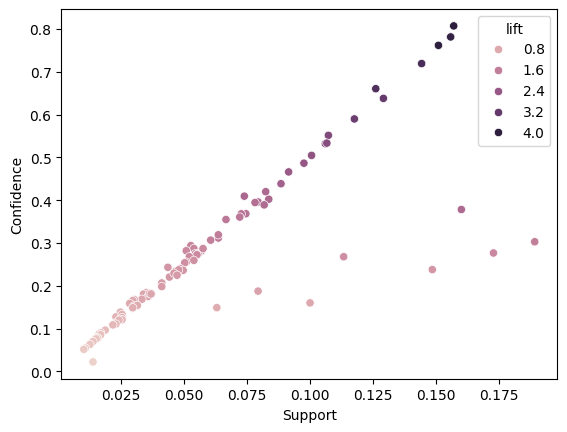

In [90]:
sns.scatterplot(data=rules, x='rule_supp', y='confidence', hue='lift')
plt.xlabel('Support')
plt.ylabel('Confidence')

def label_point(x, y, val, ax):
    a = pd.concat({'x': x, 'y': y, 'val': val}, axis=1)
    for i, point in a.iterrows():
        ax.text(point['x']+.02, point['y'], str(point['val']))

    label_point(rules['rule_supp'], rules['confidence'], rules['rule print'], plt.gca())

# Analise Exploratoria de Dados 
Análise Exploratória de Dados (EDA) ajudará a identificar padrões e relações entre esses fatores, o que pode fornecer insights valiosos sobre como eles afetam a mortalidade adulta e a expectativa de vida. Aqui estão os objetivos específicos da EDA para o dataset:

1. **Compreender a Estrutura dos Dados**
Objetivo: Obter uma visão geral sobre a distribuição e os tipos de dados de cada variável.
Como aplicar: Analisar os tipos de dados das variáveis (Year, Population, Alcohol, Hiv/aids, Hepatitisb, Measles, Lifeexpectancy, Adultmortality), identificando quais são numéricas e quais são categóricas.
Exemplo: Verificar se Year está no formato correto de ano, se as variáveis como Alcohol, Hiv/aids, e Hepatitisb são contínuas ou binárias, etc.

2. **Detectar Anomalias e Outliers**
Objetivo: Identificar valores atípicos e anômalos que possam distorcer a análise.
Como aplicar:
Usar gráficos de boxplot para examinar variáveis como Alcohol, Lifeexpectancy, Adultmortality, para verificar a presença de outliers.
Identificar valores faltantes nas variáveis numéricas, como Population, Hiv/aids, e decidir como tratá-los (preenchendo com a média ou removendo linhas).
Exemplo: Verificar se a população de um ano tem valores muito baixos ou muito altos que não fazem sentido.

3. **Avaliar a Qualidade dos Dados**
Objetivo: Verificar a integridade dos dados e tratar valores faltantes ou inconsistentes.
Como aplicar:
Analisar o número de valores nulos ou ausentes em cada variável.
Decidir o melhor tratamento para os dados ausentes (preenchê-los, removê-los, etc.).
Exemplo: Se houver valores ausentes para expectativa de vida (Lifeexpectancy), será necessário decidir se vamos preencher esses valores ou removê-los.

4. **Explorar Relações Entre Variáveis**
Objetivo: Entender como as variáveis estão inter-relacionadas, especialmente aquelas que impactam a mortalidade adulta e a expectativa de vida.
Como aplicar:
Utilizar matrizes de correlação para identificar como Alcohol, Hiv/aids, Hepatitisb, e Measles se relacionam com a mortalidade adulta e expectativa de vida.
Visualizar essas relações usando gráficos de dispersão entre Alcohol e Lifeexpectancy, Hiv/aids e Adultmortality, etc.
Exemplo: Verificar se há uma correlação negativa entre Hiv/aids e expectativa de vida, ou uma correlação positiva entre consumo de álcool e mortalidade adulta.

5. **Gerar Hipóteses**
Objetivo: Formar hipóteses sobre como as variáveis podem afetar a mortalidade adulta e a expectativa de vida.
Como aplicar:
Através da exploração das correlações, podemos levantar hipóteses, como por exemplo: "O aumento no consumo de álcool pode diminuir a expectativa de vida", ou "Países com altas taxas de HIV/AIDS apresentam maior mortalidade adulta".
Exemplo: Com base nas observações dos gráficos e da matriz de correlação, podemos investigar mais a fundo essas relações, utilizando métodos estatísticos ou de machine learning.

6. **Preparação dos Dados para Modelagem**
Objetivo: Preparar os dados para a construção de um modelo preditivo de saúde (por exemplo, previsão de Lifeexpectancy).
Como aplicar:
Decidir se deve normalizar ou padronizar variáveis como Alcohol e Hiv/aids, ou se precisa criar variáveis dummy para variáveis categóricas.
Realizar a divisão entre dados de treino e teste para validação do modelo preditivo.
Exemplo: Preparar os dados para um modelo de regressão linear ou árvores de decisão, dependendo das correlações encontradas na EDA.
Técnicas Comuns de Visualização na EDA:
Histograma – Para ver a distribuição de variáveis como Alcohol, Population, Lifeexpectancy.
Boxplot – Para verificar a presença de outliers em variáveis como Adultmortality.
Gráfico de dispersão – Para examinar a relação entre duas variáveis numéricas, como Alcohol e Lifeexpectancy.
Matriz de correlação – Para identificar a força das relações entre todas as variáveis.


# Criação de matrix de correlação para verificar as correlações entre variaveis 

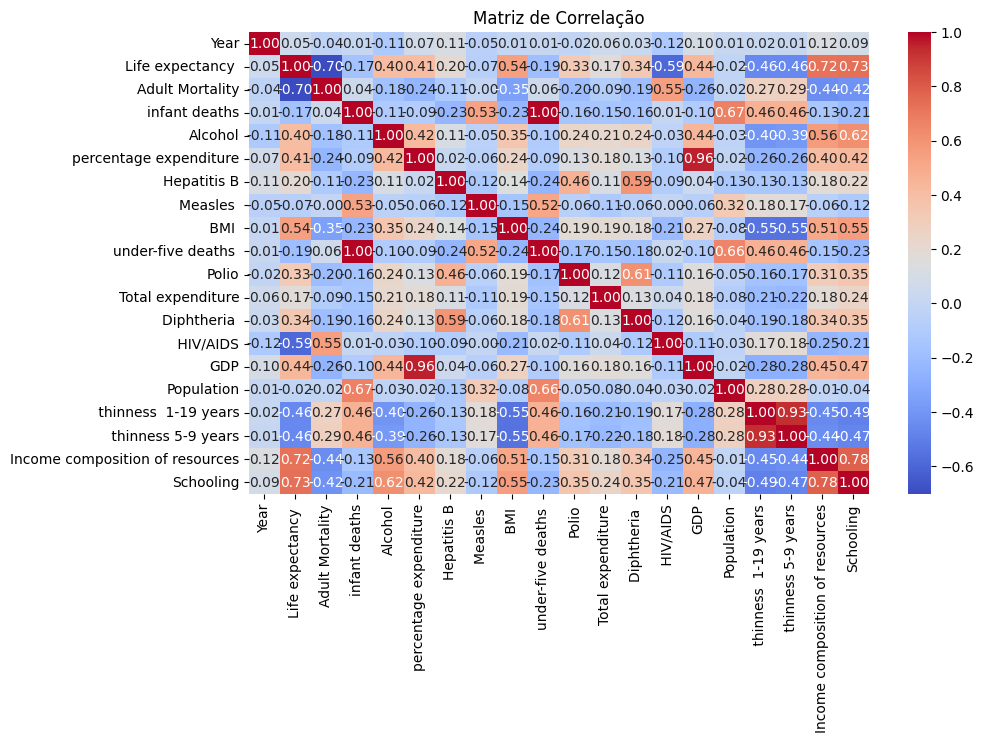

In [91]:
correlation_matrix = df.corr()

plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Matriz de Correlação')
plt.show()



In [92]:
import h2o as h
h.init()

Checking whether there is an H2O instance running at http://localhost:54321. connected.


H2O_cluster_uptime:,58 mins 12 secs
H2O_cluster_timezone:,Europe/Lisbon
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.46.0.5
H2O_cluster_version_age:,3 months and 4 days
H2O_cluster_name:,H2O_from_python_altonfreitas_8776pb
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,1.976 Gb
H2O_cluster_total_cores:,8
H2O_cluster_allowed_cores:,8
H2O_cluster_status:,"locked, healthy"
